# LSTM on Tully's system

#### Python Coding TangDD 4/10/2021
#### C Coding JiaLY 3/1/2021

### Libraries

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import random

In [37]:
import matplotlib.pyplot as plt

### Read Data and Generate Dataset

#### FORMAT OF DATASET

       0 1 2  3  4      5      6      7      8
NTRAJ,[X,V,E0.E1.RERHO0,RERHO1,IMRHO1,ACTIVE,POSS]

In [38]:
# This is a 1 a.u. timestep.
f=open("../reference/result_traj_2.txt",'r')
rawdata=f.readlines()
f.close()

nvel=0
ntraj=0

for i in range(0,len(rawdata)):
    dataline=rawdata[i].split()
    if (len(dataline)>0):
        if (dataline[0]=='VELOC'):
            nvel+=1
        if (dataline[0]=='TRAJ'):
            ntraj+=1 

nele=len(rawdata[-1].split())

In [39]:
print("nvel=",nvel,"ntraj=",ntraj,"nele=",nele)

nvel= 30 ntraj= 600 nele= 9


In [40]:
all_data_x=[]
all_data_y=[]
elec_value=[]
itraj=-1
for i in range(0,len(rawdata)):
    dataline=rawdata[i].split()
    if (len(dataline)>0):
        if (dataline[0]=='TRAJ'):
            itraj+=1
            all_data_x.append([])
            all_data_y.append([])
    if (len(dataline)>2):
        ele_train=[0,1,2,3,4,5,6]
        ele_test =[4,5,6]
        #for j in range(nele):
        temp_list=[]
        for j in ele_train:
            temp_list.append(float(dataline[j]))
        all_data_x[itraj].append(temp_list)
        temp_list=[]
        for j in ele_test:
            temp_list.append(float(dataline[j]))
        all_data_y[itraj].append(temp_list)
        elec_value.append(float(dataline[4]))

In [41]:
del rawdata

In [42]:
#elec_value_numpy=np.array(elec_value)
#del elec_value
#elec_max = elec_value_numpy.max()
#elec_min = elec_value_numpy.min()
#elec_avg = np.mean(elec_value_numpy)
#del elec_value_numpy
#print(elec_max,elec_min,elec_avg)

In [43]:
for i in range(itraj):
    print(len(all_data_x[i]),len(all_data_y[i]))

30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
30307 30307
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
23381 23381
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
18531 18531
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
15235 15235
12990 12990
12990 12990
12990 12990
1299

#### Get a 100-length subset for all trajectories

A minor concern: initial velocity results in different length of trajs.

input_length is the input timelength.

In [44]:
input_length = 100
predict_length = 1

In [45]:
# This is batched data.
all_data_packed_x=[]
all_data_packed_y=[]

# From each trajectory...
for i in range(ntraj):
    #print(int(400./int(i/nvel+4.)))
    #for j in range(0,len(all_data_x[i])-input_length-predict_length,int(400./int(float(i)/float(nvel)+4.0))):
    #    all_data_packed_x.append(all_data_x[i][j:j+input_length])
    #    all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
    for j in range(0,len(all_data_x[i])-input_length-predict_length):
        if (j%50==0):
            all_data_packed_x.append(all_data_x[i][j:j+input_length])
            all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        """
        if (i<15):
            if (j%15==0):
                all_data_packed_x.append(all_data_x[i][j:j+input_length])
                all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        else:
            if (j%7==0):
                all_data_packed_x.append(all_data_x[i][j:j+input_length])
                all_data_packed_y.append(all_data_y[i][j+input_length+predict_length-1])
        """
        #start_pop=all_data_x[i][j][4]
        #end_pop  =all_data_x[i][j+input_length-1][4]
        #pop_change = np.abs(end_pop-start_pop)
        #pop_change_list.append(pop_change)
        #if (j%10==0 or pop_change>0.02):
            #all_data_packed_x.append(all_data_x[i][j:j+input_length])
            #all_data_packed_y.append(all_data_y[i][j+input_length:j+input_length+predict_length])
            #all_data_packed_y.append(all_data_y[i][j+input_length+predict_length])


In [46]:
del all_data_x
del all_data_y

In [47]:
nsamp=len(all_data_packed_x)

In [48]:
len(all_data_packed_x[33])

100

In [49]:
all_data_packed_x[9999]

[[-3.4704935,
  -0.001487022,
  -0.009961234,
  0.009961234,
  1.0,
  2.84e-07,
  1.07e-07],
 [-3.471980537,
  -0.001487053,
  -0.009961326,
  0.009961326,
  1.0,
  2.97e-07,
  1.13e-07],
 [-3.473467606,
  -0.001487084,
  -0.009961418,
  0.009961418,
  1.0,
  3.09e-07,
  1.19e-07],
 [-3.474954705,
  -0.001487114,
  -0.009961509,
  0.009961509,
  1.0,
  3.21e-07,
  1.25e-07],
 [-3.476441834,
  -0.001487145,
  -0.009961601,
  0.009961601,
  1.0,
  3.33e-07,
  1.32e-07],
 [-3.477928995,
  -0.001487176,
  -0.009961692,
  0.009961692,
  1.0,
  3.45e-07,
  1.39e-07],
 [-3.479416186,
  -0.001487207,
  -0.009961783,
  0.009961783,
  1.0,
  3.57e-07,
  1.46e-07],
 [-3.480903408,
  -0.001487237,
  -0.009961874,
  0.009961874,
  1.0,
  3.68e-07,
  1.53e-07],
 [-3.48239066,
  -0.001487268,
  -0.009961965,
  0.009961965,
  1.0,
  3.79e-07,
  1.6e-07],
 [-3.483877943,
  -0.001487298,
  -0.009962055,
  0.009962055,
  1.0,
  3.89e-07,
  1.68e-07],
 [-3.485365256, -0.001487328, -0.009962145, 0.00996214

In [50]:
all_data_packed_y[9999]

[1.0, 1e-07, 9.62e-07]

In [51]:
all_data_packed_x[10000]

[[-3.544881862,
  -0.001488484,
  -0.009965584,
  0.009965584,
  1.0,
  5.53e-07,
  5.9e-07],
 [-3.546370359,
  -0.001488511,
  -0.009965666,
  0.009965666,
  1.0,
  5.5e-07,
  6.01e-07],
 [-3.547858884,
  -0.001488539,
  -0.009965747,
  0.009965747,
  1.0,
  5.47e-07,
  6.12e-07],
 [-3.549347436,
  -0.001488566,
  -0.009965829,
  0.009965829,
  1.0,
  5.44e-07,
  6.23e-07],
 [-3.550836016, -0.001488593, -0.00996591, 0.00996591, 1.0, 5.4e-07, 6.33e-07],
 [-3.552324623,
  -0.001488621,
  -0.009965991,
  0.009965991,
  1.0,
  5.36e-07,
  6.44e-07],
 [-3.553813257,
  -0.001488648,
  -0.009966072,
  0.009966072,
  1.0,
  5.32e-07,
  6.55e-07],
 [-3.555301919,
  -0.001488675,
  -0.009966153,
  0.009966153,
  1.0,
  5.27e-07,
  6.65e-07],
 [-3.556790607,
  -0.001488702,
  -0.009966233,
  0.009966233,
  1.0,
  5.22e-07,
  6.76e-07],
 [-3.558279322,
  -0.001488729,
  -0.009966314,
  0.009966314,
  1.0,
  5.17e-07,
  6.86e-07],
 [-3.559768065,
  -0.001488756,
  -0.009966394,
  0.009966394,
  1.

#### FORMAT OF DATASET

NTRAJ,[X,V,E0.E1.RERHO0,RERHO1,IMRHO1,ACTIVE,POSS]

Say, we are planning to feed X(t),V(t),E0(t),E1(t),RHO0(t),ACT(t) into the network, and get RHO0(t+50),ACT(t+50).

In [52]:
dataset_x=np.array(all_data_packed_x)
dataset_y=np.array(all_data_packed_y)

In [53]:
del all_data_packed_x
del all_data_packed_y

In [54]:
dataset_x.shape

(96235, 100, 7)

In [55]:
dataset_y.shape

(96235, 3)

#### Normalize

In [56]:
for i in range(nsamp):
    for j in range(input_length):
        dataset_x[i][j][0]=dataset_x[i][j][0]/20.0
        #dataset_x[i][j][1]=(dataset_x[i][j][1]*2000.0-19.0)/16.0
        #dataset_x[i][j][2]=dataset_x[i][j][2]*5.0
        #dataset_x[i][j][3]=dataset_x[i][j][3]*5.0
        dataset_x[i][j][1]=(dataset_x[i][j][1]*2000-17.0)/30.0
        dataset_x[i][j][2]=dataset_x[i][j][2]*50.0
        dataset_x[i][j][3]=dataset_x[i][j][3]*50.0
        dataset_x[i][j][4]=dataset_x[i][j][4]-0.5
        #dataset_x[i][j][4]=(dataset_x[i][j][4]-elec_avg)/(elec_max-elec_min)
        #dataset_x[i][j][5]=dataset_x[i][j][5]
        #dataset_x[i][j][6]=dataset_x[i][j][6]

for i in range(nsamp):
    dataset_y[i][0]=dataset_y[i][0]-0.5
    #dataset_y[i][0]=(dataset_y[i][0]-elec_avg)/(elec_max-elec_min)
    #dataset_y[i][1]=dataset_y[i][1]
    #dataset_y[i][2]=dataset_y[i][2]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=42)

## Build Model

In [58]:
model = Sequential()
model.add(LSTM(32, activation='tanh', input_shape=(dataset_x.shape[1], dataset_x.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh', return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh'))
#model.add(Dropout(0.2))
model.add(Dense(3, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 32)           5120      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 32)           8320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 21,859
Trainable params: 21,859
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, verbose=1, batch_size=64)

Epoch 1/5
963/963 [==============================] - 263s 269ms/step - loss: 0.0010 - val_loss: 1.9620e-05
Epoch 2/5
963/963 [==============================] - 259s 269ms/step - loss: 1.4979e-05 - val_loss: 1.4281e-05
Epoch 3/5
963/963 [==============================] - 259s 269ms/step - loss: 1.0914e-05 - val_loss: 1.2152e-05
Epoch 4/5
963/963 [==============================] - 259s 269ms/step - loss: 8.9652e-06 - val_loss: 9.8134e-06
Epoch 5/5
963/963 [==============================] - 258s 268ms/step - loss: 8.1263e-06 - val_loss: 5.2868e-06


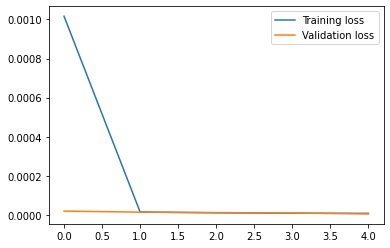

In [61]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.legend()

In [62]:
# So let's check a trajectory...
test_output = model.predict(x_test, verbose=0)

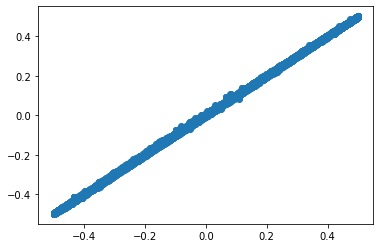

In [63]:
plt.scatter(y_test,test_output)

In [64]:
fo=open('tully_out_100.txt','w')
for ii in range(0,len(y_test.squeeze())):
    fo.write("{0}\t{1}\n".format(y_test[ii][0], test_output[ii][0]))
fo.close()

In [65]:
# Export the model to a SavedModel
model.save('model', save_format='tf')

INFO:tensorflow:Assets written to: model/assets


In [66]:
model.save('model_h5', save_format='h5')

In [67]:
test_output.size

57741

In [68]:
import numpy as np

In [69]:
from keras.models import Sequential

In [70]:
from keras.layers.core import Dense, Activation, Dropout